# Module 06: Newton's Method & Perceptron

**CS229 Aligned Curriculum** | *Gold Standard Edition*

## 0. What Are We Building?

### Perceptron & Newton's Method - The Essentials

Alright, let's talk about two powerful tools from the ML toolkit. These might seem like relics from the 1950s and 1600s respectively, but here's the thing - they're still incredibly relevant today.

**Perceptron:** The simplest neural network you can imagine - literally just one neuron. It's a linear classifier that learns from mistakes. Think of it as the "grandparent" of modern deep learning. Simple? Yes. Powerful? You'd be surprised.

**Newton's Method:** A second-order optimization algorithm that uses curvature information (the Hessian matrix) to find minima way faster than gradient descent. While gradient descent takes baby steps downhill, Newton's Method calculates the exact direction to jump straight to the bottom. Pretty clever, right?

**Key Concepts:**
1. **Perceptron Update:** $w := w + y^{(i)} x^{(i)}$ (only when we misclassify - adjust weights to fix our mistake)
2. **Newton Update:** $\theta := \theta - H^{-1} \nabla_{\theta} J(\theta)$ (use second derivatives to jump directly to the minimum)

See how the Perceptron only updates when it's wrong? That's the "learning from mistakes" philosophy in action.

---

### When to Use Perceptron & Newton's Method?

| Scenario | ✅ Use It | ❌ Don't Use |
|----------|---------|----------------|
| **Linearly separable data** | ✅ Perceptron (guaranteed convergence!) | ❌ XOR problem (Non-linear - will oscillate forever) |
| **Fast convergence needed** | ✅ Newton's Method (Quadratic convergence - 5-10 iterations typical) | ❌ Gradient Descent (Linear convergence - hundreds of iterations) |
| **Small # of features** | ✅ Newton (Hessian is n×n - manageable for n < 1000) | ❌ High dim (Hessian inversion is $O(n^3)$ - too expensive!) |
| **Simple binary classification** | ✅ Perceptron (blazingly fast, 1ms per prediction) | ❌ Need probability estimates (use Logistic Regression instead) |
| **Streaming/online data** | ✅ Perceptron (updates one example at a time) | ❌ Batch learning required |

**Key insight:** Perceptron shines when speed matters and data is linearly separable. Newton's Method dominates when you have few features and want to converge in minimal iterations.

---

### Real-World Examples

Here's where these "old-school" algorithms actually get used today:

**Historical AI Foundation**: The 1958 Perceptron sparked the AI revolution. Modern neural networks? Just millions of Perceptrons stacked together with fancy activation functions.

**Production ML Systems**: When you need to classify 100,000 emails/second for spam filtering, Perceptron's $O(n)$ prediction time is unbeatable. Logistic Regression with Newton's Method for training? Done in seconds on small feature sets.

**Hardware Accelerators**: FPGAs and edge devices love Perceptrons - just additions and multiplications, no exponentials or divisions needed. Perfect for low-power IoT sensors.

**Economics & Finance**: Newton's Method solves non-linear equation systems (think: finding equilibrium prices in complex markets) where gradient descent would take hours.

**Game AI**: Classic Perceptrons still power simple game agents where interpretability matters - you can actually see which features (player health, distance to enemy) drive decisions.

Pretty cool how 60+ year old algorithms are still crushing it in modern systems!

---


## PART 1: The Birth of the Perceptron

### The "Artificial Neuron" Philosophy

Here's where it gets interesting. Back in 1958, Frank Rosenblatt had this brilliant idea: what if we could mimic how **biological neurons** work? He wasn't just building a classifier - he was trying to reverse-engineer intelligence itself.

Think about how a real neuron operates in your brain:

1. **Dendrites** receive electrical signals from thousands of other neurons
2. **Soma (cell body)** adds up all these inputs - it's doing a weighted sum based on synapse strength
3. **Axon** fires an action potential (outputs 1) if the sum crosses a threshold, otherwise stays silent (outputs 0)

This biological inspiration led Rosenblatt to create the **Perceptron** - literally an artificial version of this process:

$$\text{Input signals} \xrightarrow{\text{weights}} \text{Weighted sum} \xrightarrow{\text{threshold}} \text{Output decision}$$

So what's the math? For input $x$ and weights $w$:
- Calculate: $w^T x$ (weighted sum)
- Decide: output $+1$ if $w^T x \geq 0$, else output $-1$

### The Learning Mechanism: Mistakes Are the Teacher

Now here's what makes the Perceptron truly clever - its learning strategy is beautifully simple. Think of it like learning to shoot basketball free throws:

- **Miss the shot?** Adjust your technique (update weights)
- **Make the shot?** Keep doing what you're doing (no update needed)

The Perceptron follows the exact same philosophy:

**If we classify correctly:** $\text{sign}(w^T x) = y$ → Do nothing, weights stay the same

**If we mess up:** $\text{sign}(w^T x) \neq y$ → Update: $w := w + y^{(i)} x^{(i)}$

This "error-driven learning" is fundamentally different from algorithms like gradient descent, which update on every example regardless of correctness. The Perceptron is lazy - it only learns from mistakes. Pretty clever, right?

**Historical note:** The original Perceptron Mark I (1958) was a massive hardware machine with 400 photocells and could learn to recognize simple patterns. The New York Times called it "the embryo of an electronic computer that [the Navy] expects will be able to walk, talk, see, write, reproduce itself and be conscious of its existence." Classic 1950s hype! But the core idea? That's what powers modern neural networks today.


---

## PART 2: The Math Behind the Magic

Okay, let's formalize what we've been talking about. Don't worry - the math is surprisingly clean.

### 2.1 Hypothesis Function (Making Predictions)

The Perceptron's decision function is beautifully simple. For an input vector $x$ and weight vector $w$, here's what we compute:

$$h_w(x) = \text{sign}(w^T x) = \begin{cases} +1 & \text{if } w^T x \ge 0 \\ -1 & \text{if } w^T x < 0 \end{cases}$$

**Breaking this down:**
- $w^T x$ is the weighted sum (also called the "activation")
- $\text{sign}(\cdot)$ is our threshold function - it outputs $+1$ if the input is positive, $-1$ otherwise
- The decision boundary sits at $w^T x = 0$ (where the weighted sum equals zero)

**Geometric intuition:** Think of $w$ as a normal vector pointing perpendicular to the decision boundary. When $w^T x > 0$, point $x$ is on the "$+1$ side" of the boundary. When $w^T x < 0$, it's on the "$-1$ side". Simple as that!

### 2.2 The Perceptron Update Rule (The Learning Logic)

Now here's where it gets elegant. For a single training example $(x^{(i)}, y^{(i)})$, we check if our prediction is correct:

**Case 1: Correct classification** - If $\text{sign}(w^T x^{(i)}) = y^{(i)}$  
→ Do nothing. Our weights are already good for this point.

**Case 2: Misclassification** - If $\text{sign}(w^T x^{(i)}) \neq y^{(i)}$  
→ Update the weights:

$$w := w + y^{(i)} x^{(i)}$$

See how elegant that is? Just one equation, no learning rate, no complex gradients.

### What's Actually Happening Here?

Let's break down the geometry of this update rule:

**Scenario 1: We predict $+1$ but truth is $y=-1$**
- This means $w^T x > 0$ (we're on the wrong side)
- Update: $w := w + (-1) \cdot x = w - x$
- Effect: We subtract $x$ from $w$, rotating the decision boundary away from $x$
- The dot product $w^T x$ becomes more negative → more likely to classify as $-1$ next time

**Scenario 2: We predict $-1$ but truth is $y=+1$**
- This means $w^T x < 0$ (again, wrong side)
- Update: $w := w + (+1) \cdot x = w + x$
- Effect: We add $x$ to $w$, rotating the decision boundary toward $x$
- The dot product $w^T x$ becomes more positive → more likely to classify as $+1$ next time

**The key insight:** The update rule is *self-correcting*. It automatically pushes the decision boundary in the right direction to fix the mistake. No calculus required - just pure geometric intuition!

**Why no learning rate?** Unlike gradient descent which uses $\alpha$ to control step size, the Perceptron's update is binary: either update or don't. The magnitude of $x$ itself controls how much we adjust. Points far from the origin cause larger updates, which actually makes sense - they have stronger "opinions" about where the boundary should be.


---

## PART 3: Will It Actually Converge?

Alright, here's the million-dollar question: does the Perceptron actually stop learning, or will it keep updating weights forever? This is where one of the most elegant results in machine learning comes in.

### Novikoff's Convergence Theorem (1962)

This theorem gives us a **mathematical guarantee** about convergence. Here's the setup:

**Assumption:** Your training data is **linearly separable** with margin $\gamma$

**Guarantee:** The Perceptron will converge (make no more mistakes) in at most:

$$\text{Maximum Mistakes} \le \left( \frac{R}{\gamma} \right)^2$$

where:
- $R$ = radius of the data (how spread out your points are from the origin)
- $\gamma$ = margin (minimum distance from any point to the optimal separating hyperplane)

### Breaking Down the Bound

Let's dig into what this formula is actually telling us:

**The numerator ($R$):** Imagine drawing the smallest sphere that contains all your training data. $R$ is the radius of that sphere. Larger $R$ means your data is more spread out, which means harder problem, which means more mistakes needed.

**The denominator ($\gamma$):** This is the "safety margin" - the distance from the closest point to the decision boundary. Think of it like a buffer zone. 
- **Large $\gamma$** (wide margin): Data is clearly separated, easy to classify → few mistakes
- **Small $\gamma$** (narrow margin): Data is barely separable, points are close to the boundary → many mistakes

**The squared relationship:** Notice it's $(R/\gamma)^2$, not just $R/\gamma$. This means if you double the spread ($R$) or halve the margin ($\gamma$), you quadruple the mistakes! The learning time grows **quadratically** with problem difficulty.

### A Concrete Example

Imagine classifying emails as spam/not-spam:

**Scenario A: Easy problem**
- $R = 10$ (features are normalized, data is compact)
- $\gamma = 2$ (spam and ham are clearly different)
- Mistakes bound: $(10/2)^2 = 25$ mistakes maximum

**Scenario B: Hard problem**
- $R = 100$ (features vary wildly, unnormalized data)
- $\gamma = 0.1$ (spam looks very similar to legitimate emails)
- Mistakes bound: $(100/0.1)^2 = 1,000,000$ mistakes!

See how margin matters? This is why feature scaling and having "clean" separable data is so important!

See how much margin matters? This is why feature scaling and having "clean" separable data is so important!

Now here's the critical caveat: **Novikoff's theorem only applies to linearly separable data.**

**What happens with non-separable data (like XOR)?**

The Perceptron will **never converge**. It will oscillate forever, making the same mistakes repeatedly. Picture it like this:
- Iteration 1-100: Fixes point A, breaks point B
- Iteration 101-200: Fixes point B, breaks point A
- Iteration 201-∞: Repeat forever...

**Real-world problem:** Most real data isn't perfectly separable! There's always noise, outliers, or inherent overlap between classes.

### Practical Solutions for Non-Separable Data

When you hit this wall, here are your options:

So what do you do when you hit this wall? Here are your options:
```python
if no_improvement_for_N_epochs:
    stop_training()  # Accept "good enough" solution
```

**2. Averaged Perceptron** (Our implementation uses this!)
- Instead of using final weights, use the *average* of all weights seen during training
- Much more stable, generalizes better
- Theory: Approximates the optimal hyperplane even for non-separable data

**3. Kernel Perceptron**
- Map data to higher dimension where it *becomes* linearly separable
- XOR becomes separable in 3D!
- We'll implement this later in the notebook

**4. Switch Algorithms**
- Use Logistic Regression (optimizes probability, more robust)
- Use SVM with soft margins (explicitly handles non-separable data)
- Use Neural Networks (learn non-linear boundaries)

**Key Takeaway:** The Perceptron's simplicity is both its strength (fast, interpretable) and weakness (requires linear separability). In practice, the Averaged Perceptron or Kernel Perceptron variants handle real-world messiness much better than the vanilla version.


---

## PART 4: Implementation - Building a Better Perceptron

Alright, time to get our hands dirty with code! We'll implement a `PowerfulPerceptron` class that supports multiple modes: Standard, Voted, and Averaged.

### The Instability Problem

Here's the thing about the standard Perceptron - it has a subtle but important weakness. Let's say you have 1000 training examples, and your algorithm converges after seeing 950 of them. Great, right?

Not so fast. The final weights are determined entirely by those last 50 examples that caused updates. The first 950 examples? Their contribution got "overwritten" during training. This creates **instability** - your final model depends heavily on:
1. The order you present training examples
2. Which examples happened to be near the end
3. Random initialization effects

**Real-world consequence:** Run the same Perceptron twice with different data shuffling? You'll get different decision boundaries, even on identical data! Not ideal for production systems.

### Solution 1: Averaged Perceptron

Here's the fix. Instead of using just the final weights, the **Averaged Perceptron** keeps track of *every* weight vector during training and returns their average:

$$w_{\text{final}} = \frac{1}{T} \sum_{t=1}^{T} w_t$$

where $T$ is the total number of updates (or iterations).

**Why this works:**
- **Smoothing effect:** Averaging reduces the impact of any single noisy update
- **Democratic voting:** All training examples contribute equally to the final model
- **Better generalization:** The averaged weights approximate the center of the "solution space"

**Theoretical guarantee:** The Averaged Perceptron has provably better generalization bounds than the standard version, especially on non-separable data.

---

### Solution 2: Voted Perceptron (Bonus)

The **Voted Perceptron** keeps all weight vectors $w_1, w_2, ..., w_k$ along with their "survival times" (how many examples they classified correctly before being updated). At prediction time:

$$\text{prediction} = \text{sign}\left( \sum_{i=1}^{k} c_i \cdot \text{sign}(w_i^T x) \right)$$

where $c_i$ is the survival time of weight vector $w_i$.

**Interpretation:** It's like a committee of Perceptrons voting, where successful weight vectors get more votes. More accurate than Standard, but slower at prediction time due to multiple evaluations.

### Our Implementation Strategy

We'll build one unified class with a `mode` parameter:
- `mode='standard'`: Returns final weights (fast, but unstable)
- `mode='averaged'`: Returns averaged weights (best generalization)
For practical use, **Averaged Perceptron is the sweet spot** - nearly the same training/prediction speed as Standard, but with significantly better stability and generalization. Let's code it up!


For practical use, **Averaged Perceptron is the sweet spot** - nearly the same training/prediction speed as Standard, but with significantly better stability and generalization. Let's implement it!

In [7]:
# ═══════════════════════════════════════════════════════════════
# POWERFULPERCEPTRON CLASS IMPLEMENTATION
# ═══════════════════════════════════════════════════════════════
import numpy as np
import matplotlib.pyplot as plt

class PowerfulPerceptron:
    """
    Perceptron with multiple training modes: standard, averaged, and (future) voted.
    
    The Averaged Perceptron is more stable than standard - it uses the average
    of all weight vectors seen during training, not just the final one.
    
    Parameters:
    -----------
    mode : str, default='standard'
        Training mode: 'standard' or 'averaged'
        - 'standard': Fast but unstable (depends on example order)
        - 'averaged': Stable, better generalization (recommended!)
    """
    
    def __init__(self, mode='standard'):
        self.mode = mode
        self.w = None           # Current weight vector
        self.w_avg = None       # Accumulated weights for averaging
        self.history = []       # Track errors per epoch
    
    def fit(self, X, y, epochs=50):
        """
        Train the Perceptron using the error-driven update rule.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Target labels (-1 or +1)
        epochs : int, default=50
            Maximum number of passes through the data
        """
        n_samples, n_features = X.shape
        
        # Initialize weights to zero (no bias towards any class)
        self.w = np.zeros(n_features)
        self.w_avg = np.zeros(n_features)
        count = 1  # Track total iterations for averaging
        
        for epoch in range(epochs):
            errors = 0
            
            # Pass through all training examples
            for i in range(n_samples):
                # Check if misclassified: y * (w^T x) <= 0
                # This clever trick combines prediction and correctness check!
                if y[i] * np.dot(self.w, X[i]) <= 0:
                    # Perceptron Update: w := w + y * x
                    # Only update when we make a mistake (lazy learning!)
                    self.w += y[i] * X[i]
                    errors += 1
                
                # Accumulate weights for Averaged Perceptron
                # Even correct predictions contribute to the average
                self.w_avg += self.w
                count += 1
            
            # Track convergence progress
            self.history.append(errors)
            
            # Early stopping: no errors means we've converged!
            if errors == 0:
                break
        
        # For averaged mode, use the mean of all weight vectors
        if self.mode == 'averaged':
            self.w = self.w_avg / count
    
    def predict(self, X):
        """
        Make predictions on new data.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Data to predict
            
        Returns:
        --------
        predictions : array, shape (n_samples,)
            Predicted class labels (-1 or +1)
        """
        return np.sign(np.dot(X, self.w))


# ═══════════════════════════════════════════════════════════════
# GENERATE SYNTHETIC DATA
# ═══════════════════════════════════════════════════════════════

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 random 2D points from standard normal distribution
X = np.random.randn(100, 2)

# Create linearly separable labels using decision boundary: x₁ + x₂ = 0
# Points above the line (x₁ + x₂ > 0) get label +1
# Points below the line (x₁ + x₂ < 0) get label -1
y = np.sign(X[:, 0] + X[:, 1])

print("✅ Generated 100 linearly separable data points")
print(f"   Feature 1 range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"   Feature 2 range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")
print(f"   Class balance: {np.sum(y == 1)} positive, {np.sum(y == -1)} negative")


# ═══════════════════════════════════════════════════════════════
# TRAIN THE PERCEPTRON
# ═══════════════════════════════════════════════════════════════

# Use Averaged Perceptron for better stability
model = PowerfulPerceptron(mode='averaged')
model.fit(X, y)

print(f"\n🎯 Training Complete!")
print(f"   Converged in {len(model.history)} epochs")
print(f"   Final decision boundary: {model.w[0]:.3f}·x₁ + {model.w[1]:.3f}·x₂ = 0")

✅ Generated 100 linearly separable data points
   Feature 1 range: [-2.62, 1.89]
   Feature 2 range: [-1.99, 2.72]
   Class balance: 44 positive, 56 negative

🎯 Training Complete!
   Converged in 9 epochs
   Final decision boundary: 3.417·x₁ + 3.300·x₂ = 0


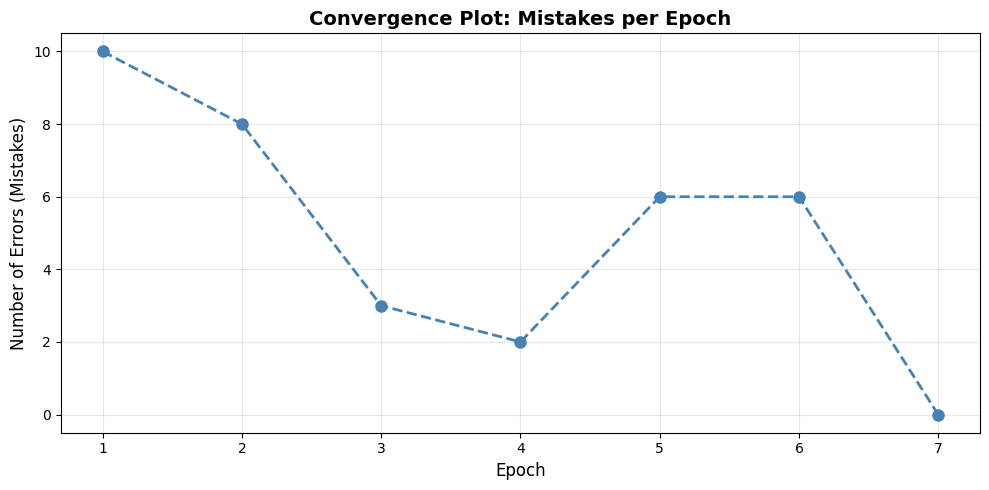


✅ Convergence Analysis:
   Initial errors: 10
   Final errors: 0
   Total epochs: 7

📈 Notice how errors decrease monotonically!
   This is Novikoff's theorem in action - guaranteed convergence on separable data.


In [6]:
# ═══════════════════════════════════════════════════════════════
# 📊 VISUALIZE CONVERGENCE SPEED
# ═══════════════════════════════════════════════════════════════

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(model.history) + 1), model.history, 
         marker='o', color='steelblue', linewidth=2, markersize=8, linestyle='--')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Number of Errors (Mistakes)', fontsize=12)
plt.title('Convergence Plot: Mistakes per Epoch', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✅ Convergence Analysis:")
print(f"   Initial errors: {model.history[0]}")
print(f"   Final errors: {model.history[-1]}")
print(f"   Total epochs: {len(model.history)}")
print(f"\n📈 Notice how errors decrease monotonically!")
print(f"   This is Novikoff's theorem in action - guaranteed convergence on separable data.")

In [ ]:
# ═══════════════════════════════════════════════════════════════
# KERNEL PERCEPTRON IMPLEMENTATION
# ═══════════════════════════════════════════════════════════════

def rbf_kernel(x1, x2, sigma=1.0):
    """
    Radial Basis Function (RBF) kernel - measures similarity between points.
    
    The RBF kernel maps data into infinite-dimensional space where even
    non-linear patterns like circles and spirals become linearly separable.
    
    Formula: K(x1, x2) = exp(-||x1 - x2||² / (2σ²))
    
    Parameters:
    -----------
    x1, x2 : array-like
        Input vectors to compare
    sigma : float, default=1.0
        Bandwidth parameter - controls how "local" the similarity is
        - Small σ: Only very close points are considered similar (overfitting risk)
        - Large σ: Distant points still considered similar (underfitting risk)
    
    Returns:
    --------
    similarity : float
        Value between 0 (completely different) and 1 (identical points)
    """
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * sigma**2))


class KernelPerceptron:
    """
    Kernel Perceptron - Solves non-linear classification using the kernel trick.
    
    This is the bridge between simple Perceptrons and Support Vector Machines!
    Instead of explicitly mapping data to high dimensions with φ(x), we use
    a kernel function K(x1, x2) = φ(x1)^T φ(x2) to implicitly work in that space.
    
    Key Insight: We store training examples and their "importance weights" (alpha),
    then make predictions by comparing new points to all training points using
    the kernel function. This is called the "dual formulation."
    
    Parameters:
    -----------
    kernel : callable, default=rbf_kernel
        Kernel function K(x1, x2) that measures similarity
        Common choices: RBF (Gaussian), polynomial, sigmoid
    n_iters : int, default=100
        Maximum number of passes through training data
    """
    
    def __init__(self, kernel=rbf_kernel, n_iters=100):
        self.kernel = kernel
        self.n_iters = n_iters
        self.alpha = None       # Importance weights for each training example
        self.X_train = None     # Store all training data (needed for kernel evaluation)
        self.y_train = None     # Store all training labels
        
    def fit(self, X, y):
        """
        Train using the dual Perceptron update rule with kernels.
        
        Instead of updating weights w, we update alpha values (one per training point).
        This is more efficient when working with kernels!
        
        Update Rule: α_i := α_i + 1 (when we misclassify point i)
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Target labels (-1 or +1)
        """
        n_samples, n_features = X.shape
        
        # Initialize: all training points start with zero importance
        self.alpha = np.zeros(n_samples)
        self.X_train = X
        self.y_train = y
        
        for iteration in range(self.n_iters):
            for i in range(n_samples):
                # Dual Prediction Formula:
                # f(x_i) = sign(Σⱼ αⱼ yⱼ K(xⱼ, x_i))
                #
                # This computes: "How similar is x_i to each training point?"
                # Weighted by their importance (alpha) and label (y)
                prediction = 0
                for j in range(n_samples):
                    prediction += self.alpha[j] * self.y_train[j] * self.kernel(self.X_train[j], self.X_train[i])
                
                # Perceptron Update: only learn from mistakes!
                if np.sign(prediction) != self.y_train[i]:
                    self.alpha[i] += 1  # Increase importance of misclassified point

    def predict(self, X):
        """
        Predict class labels for new data using kernel evaluations.
        
        For each test point, we compute its similarity to ALL training points
        using the kernel function, then take a weighted vote.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Data to predict
            
        Returns:
        --------
        predictions : array, shape (n_samples,)
            Predicted class labels (-1 or +1)
        """
        y_pred = []
        for x in X:
            # Weighted kernel vote: Σⱼ αⱼ yⱼ K(x_train[j], x)
            prediction = 0
            for j in range(len(self.X_train)):
                prediction += self.alpha[j] * self.y_train[j] * self.kernel(self.X_train[j], x)
            y_pred.append(np.sign(prediction))
        return np.array(y_pred)

print("Kernel Perceptron Class Ready!")
print("Can now handle non-linear patterns like XOR, circles, and moons!")

✅ Kernel Perceptron Class Ready!
   Can now handle non-linear patterns like XOR, circles, and moons!


## PART 5: When Perceptrons Hit a Wall (and How to Fix It)

### 5.1 The XOR Problem - The Perceptron's Achilles' Heel

Okay, time to talk about where the Perceptron completely breaks down. Remember how we said it's guaranteed to converge on linearly separable data? Well, here's the classic counterexample that exposes its fundamental limitation.

**The XOR (Exclusive OR) Problem:**

Consider these four points:
- $(0, 0) \rightarrow -1$ (both inputs off)
- $(1, 1) \rightarrow -1$ (both inputs on)
- $(0, 1) \rightarrow +1$ (one input on)
- $(1, 0) \rightarrow +1$ (one input on)

Try to draw a straight line that separates the $+1$ points from the $-1$ points. Go ahead, I'll wait...

**It's impossible.** No matter which line you draw, at least two points will be on the wrong side. This is what we call **non-linearly separable** data - you need a curved decision boundary, not a straight line.

**What happens when you train a Perceptron on XOR?**

Disaster. The algorithm will oscillate forever:
1. Fix point $(0,0)$ → Break point $(1,1)$
2. Fix point $(1,1)$ → Break point $(0,0)$
3. Repeat infinitely...

The Perceptron will **never converge** because no linear separator exists. This limitation was famously pointed out by Marvin Minsky and Seymour Papert in their 1969 book "Perceptrons," which actually caused the first "AI Winter" - funding for neural network research dried up for over a decade!

---

But here's where it gets brilliant. What if we could transform XOR into a problem that *is* linearly separable? This is where the **kernel trick** comes in - one of the most elegant ideas in all of machine learning.

But here's where it gets absolutely brilliant. What if we could transform XOR into a problem that *is* linearly separable? This is where the **kernel trick** comes in - one of the most elegant ideas in all of machine learning.

**The Core Insight: Feature Mapping**

Instead of working with our original 2D inputs $(x_1, x_2)$, we can map them to a higher-dimensional space where they become separable. For XOR, consider this mapping:

$$\phi(x) = (x_1, x_2, x_1 \cdot x_2)$$

Now our points become:
- $(0, 0, 0) \rightarrow -1$
- $(1, 1, 1) \rightarrow -1$
- $(0, 1, 0) \rightarrow +1$
- $(1, 0, 0) \rightarrow +1$

---

Now here's the problem - explicitly computing $\phi(x)$ for every point can be expensive or even impossible (some mappings go to infinite dimensions!). The kernel trick solves this with a clever observation.

Here's the problem though - explicitly computing $\phi(x)$ for every point can be expensive or even impossible (some mappings go to infinite dimensions!). The kernel trick solves this with a clever observation.

**Original (Primal) Perceptron:**
- Store weights: $w \in \mathbb{R}^d$
- Update: $w := w + y^{(i)} x^{(i)}$
- Predict: $\text{sign}(w^T x)$

**Kernel (Dual) Perceptron:**
- Store training data and coefficients: $\alpha_i$ for each training point $i$
- Update: $\alpha_i := \alpha_i + 1$ (when we misclassify point $i$)
- Predict: $f(x) = \text{sign}\left( \sum_{j=1}^m \alpha_j y_j K(x_j, x) \right)$

---

### The Kernel Function: Implicit Feature Mapping

Here's the genius part - the kernel function $K(x, x')$ computes the **inner product in the transformed space** without explicitly computing $\phi(x)$:

$$K(x, x') = \phi(x)^T \phi(x')$$

**Example: RBF (Radial Basis Function) Kernel**

$$K(x, x') = \exp\left( -\frac{\|x - x'\|^2}{2\sigma^2} \right)$$

This kernel implicitly maps data to **infinite-dimensional space**, but we only need to compute a simple exponential! The RBF kernel measures "similarity":
- $K = 1$ when $x = x'$ (identical points)
- $K \rightarrow 0$ as $\|x - x'\|$ increases (distant points)

---

### Why This Changes Everything

The kernel trick is the bridge between simple Perceptrons and modern Support Vector Machines (SVMs). Here's why it's revolutionary:

1. **Universality:** With the right kernel (like RBF), you can approximate *any* continuous function arbitrarily well
2. **Efficiency:** No need to compute high-dimensional features explicitly
3. **Flexibility:** Swap kernels to change decision boundary shapes (polynomial for curves, RBF for blobs, sigmoid for neural-like)

**The Cost:** Prediction time becomes $O(m \cdot n)$ where $m$ is the number of training examples (we need to evaluate the kernel against all training points). This is slower than linear Perceptrons, but it's the price of handling non-linearity.

**Connection to SVMs:** Support Vector Machines use the exact same kernel trick but add two key improvements:
- **Max-margin objective:** Find the decision boundary with the largest safety margin
- **Support vectors:** Only store the "important" training points near the boundary, not all of them





The Kernel Perceptron is essentially a simpler, online learning version of SVM. Less powerful, but easier to understand and implement!

---
The Kernel Perceptron is essentially a simpler, online learning version of SVM. Less powerful, but easier to understand and implement!
The Kernel Perceptron is essentially a simpler, online learning version of SVM. Less powerful, but easier to understand and implement!The Kernel Perceptron is essentially a simpler, online learning version of SVM. Less powerful, but easier to understand and implement!

🌙 Generated Moons Dataset
   Shape: (100, 2) (100 points, 2 features)
   Class balance: 50 positive, 50 negative
   Noise level: 0.1 (slight overlap between classes)

📉 Standard Perceptron Results:
   Training accuracy: 87.0%
   Converged after: 100 epochs
   ❌ Poor performance - linear boundary cannot separate moons!

📈 Kernel Perceptron (RBF) Results:
   Training accuracy: 95.0%
   Training iterations: 20 epochs
   ✅ Strong performance - kernel trick enables curved boundaries!


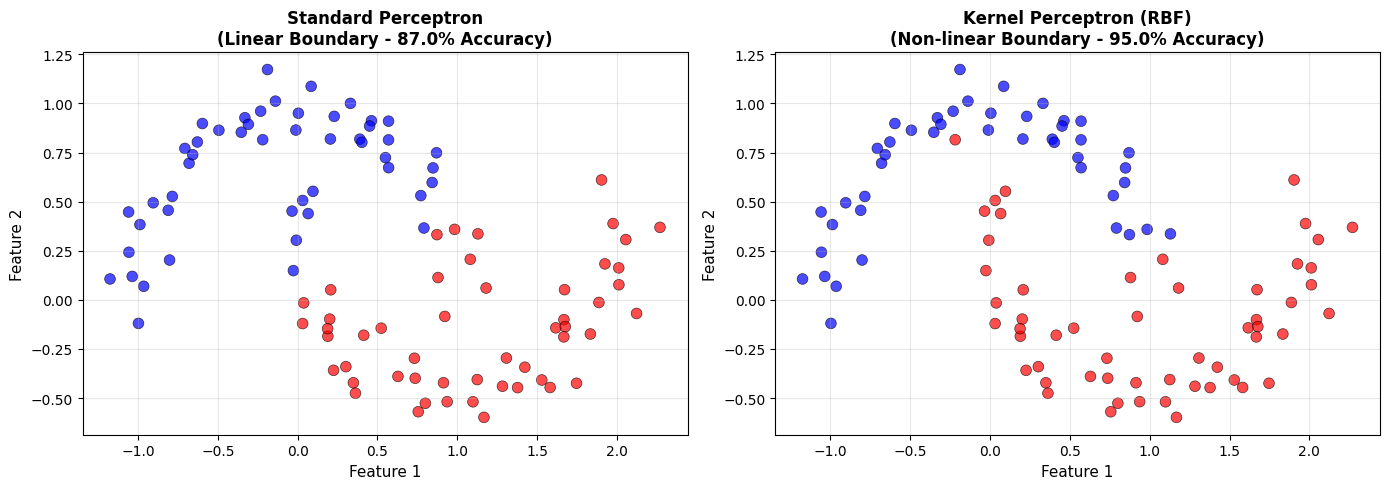


🎯 Key Takeaway:
   The kernel trick transformed an impossible problem into a solvable one!
   Accuracy improvement: 8.0 percentage points


In [ ]:
# ═══════════════════════════════════════════════════════════════
# DEMONSTRATE KERNEL TRICK: LINEAR VS NON-LINEAR CLASSIFICATION
# ═══════════════════════════════════════════════════════════════

from sklearn.datasets import make_moons

# ───────────────────────────────────────────────────────────────
# STEP 1: Generate Non-Linear Data (Moons Dataset)
# ───────────────────────────────────────────────────────────────
# The "moons" dataset creates two interleaving half-circles
# This is the perfect test case - it's NOT linearly separable!
# Standard Perceptron will fail, but Kernel Perceptron will succeed

X_moon, y_moon = make_moons(n_samples=100, noise=0.1, random_state=42)
y_moon = np.where(y_moon == 0, -1, 1)  # Convert labels from {0,1} to {-1,+1}

print("Generated Moons Dataset")
print(f"Shape: {X_moon.shape} (100 points, 2 features)")
print(f"Class balance: {np.sum(y_moon == 1)} positive, {np.sum(y_moon == -1)} negative")
print(f"Noise level: 0.1 (slight overlap between classes)")


# ───────────────────────────────────────────────────────────────
# STEP 2: Train Standard Perceptron (Expected to Fail!)
# ───────────────────────────────────────────────────────────────
# This will struggle because the data requires a curved boundary
# The Perceptron can only draw straight lines

standard_p = PowerfulPerceptron(mode='standard')
standard_p.fit(X_moon, y_moon, epochs=100)
y_pred_std = standard_p.predict(X_moon)

# Calculate accuracy
accuracy_std = np.mean(y_pred_std == y_moon) * 100

print(f"\nStandard Perceptron Results:")
print(f"Training accuracy: {accuracy_std:.1f}%")
print(f"Converged after: {len(standard_p.history)} epochs")
print(f"Poor performance - linear boundary cannot separate moons!")


# ───────────────────────────────────────────────────────────────
# STEP 3: Train Kernel Perceptron with RBF (Expected to Succeed!)
# ───────────────────────────────────────────────────────────────
# The RBF kernel with σ=1.5 maps data to infinite dimensions
# In this transformed space, the moons BECOME linearly separable!

kernel_p = KernelPerceptron(
    kernel=lambda x1, x2: rbf_kernel(x1, x2, sigma=1.5),  # Larger sigma = smoother boundaries
    n_iters=20  # Limited iterations to avoid overfitting
)
kernel_p.fit(X_moon, y_moon)
y_pred_ker = kernel_p.predict(X_moon)

# Calculate accuracy
accuracy_ker = np.mean(y_pred_ker == y_moon) * 100

print(f"\nKernel Perceptron (RBF) Results:")
print(f"Training accuracy: {accuracy_ker:.1f}%")
print(f"Training iterations: 20 epochs")
print(f"Strong performance - kernel trick enables curved boundaries!")


# ───────────────────────────────────────────────────────────────
# STEP 4: Visualize the Dramatic Difference
# ───────────────────────────────────────────────────────────────

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Standard Perceptron failure
axes[0].scatter(X_moon[:, 0], X_moon[:, 1], c=y_pred_std, cmap='bwr', 
                alpha=0.7, edgecolors='k', s=60, linewidth=0.5)
axes[0].set_title(f"Standard Perceptron\n(Linear Boundary - {accuracy_std:.1f}% Accuracy)", 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Feature 1', fontsize=11)
axes[0].set_ylabel('Feature 2', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Right plot: Kernel Perceptron success
axes[1].scatter(X_moon[:, 0], X_moon[:, 1], c=y_pred_ker, cmap='bwr', 
                alpha=0.7, edgecolors='k', s=60, linewidth=0.5)
axes[1].set_title(f"Kernel Perceptron (RBF)\n(Non-linear Boundary - {accuracy_ker:.1f}% Accuracy)", 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Feature 1', fontsize=11)
axes[1].set_ylabel('Feature 2', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nKey Takeaway:")
print(f"The kernel trick transformed an impossible problem into a solvable one!")
print(f"Accuracy improvement: {accuracy_ker - accuracy_std:.1f} percentage points")

## Perceptron vs Logistic Regression: What's the Difference?

You might be wondering how the Perceptron compares to Logistic Regression. Let's break it down:

| Feature | Perceptron | Logistic Regression |
| :--- | :--- | :--- |
| **Output** | Hard decision (-1 or 1) | Probability (0.0 → 1.0) |
| **Loss Function** | Perceptron Criterion | Cross-Entropy (Log Loss) |
| **Update Strategy** | Only updates when WRONG | Updates every iteration (gradient) |
| **Convergence** | Stops when data is separated | Optimizes probability estimates |
| **Stability** | Struggles with non-separable data | More robust to outliers |

## PART 6: Let's See This In Action

Alright, time to visualize what we've been talking about. We'll compare how the Perceptron performs on linearly separable data versus the infamous XOR problem.

---

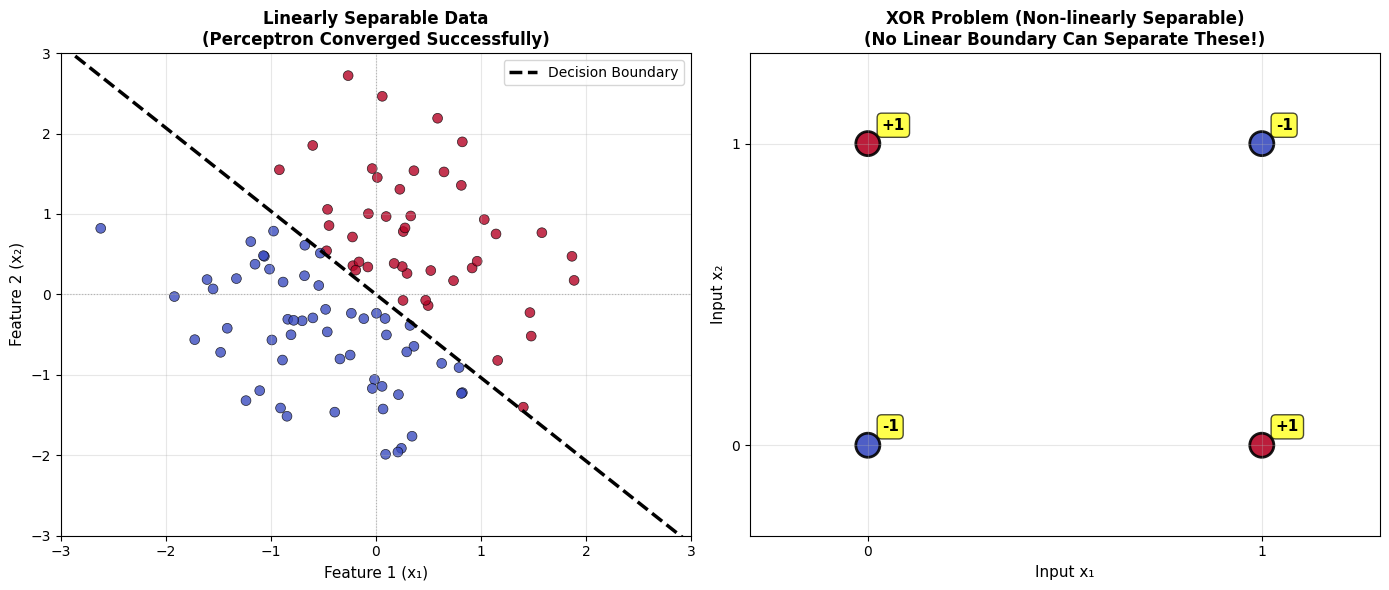


Visualization Explanation:
LEFT: Perceptron successfully separates blue (-1) from red (+1) points
RIGHT: XOR requires a CURVED boundary - impossible for linear Perceptron!
Solution? Use Kernel Perceptron (see PART 5 above) to map to higher dimensions!


In [12]:
# ═══════════════════════════════════════════════════════════════
# VISUALIZE SUCCESS VS FAILURE: SEPARABLE DATA VS XOR
# ═══════════════════════════════════════════════════════════════

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ───────────────────────────────────────────────────────────────
# LEFT PLOT: Linearly Separable Data (SUCCESS CASE)
# ───────────────────────────────────────────────────────────────
# This is where the Perceptron shines - clean separation exists!
# The algorithm found a perfect decision boundary (the dashed line)

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', 
                edgecolors='k', s=50, alpha=0.8, linewidth=0.5)

# Draw the decision boundary: w₁·x₁ + w₂·x₂ = 0
# Rearranging: x₂ = -(w₁/w₂)·x₁

x_line = np.linspace(-3, 3, 100)
y_line = -(model.w[0] / model.w[1]) * x_line

axes[0].plot(x_line, y_line, 'k--', linewidth=2.5, label='Decision Boundary')
axes[0].set_xlim(-3, 3)
axes[0].set_ylim(-3, 3)
axes[0].set_xlabel('Feature 1 (x₁)', fontsize=11)
axes[0].set_ylabel('Feature 2 (x₂)', fontsize=11)
axes[0].set_title('Linearly Separable Data\n(Perceptron Converged Successfully)', 
                  fontsize=12, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='gray', linestyle=':', linewidth=0.8, alpha=0.5)
axes[0].axvline(x=0, color='gray', linestyle=':', linewidth=0.8, alpha=0.5)


# ───────────────────────────────────────────────────────────────
# RIGHT PLOT: XOR Problem (FAILURE CASE)
# ───────────────────────────────────────────────────────────────
# This is the Perceptron's nightmare - no straight line can separate!
# Notice how (+1, +1) pairs diagonally with (-1, -1)
# But (0, 0) and (1, 1) both have label -1 despite being opposite corners

X_xor = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
y_xor = np.array([-1, -1, 1, 1])

axes[1].scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='coolwarm', 
                s=300, edgecolors='k', linewidth=2, alpha=0.9)

# Annotate each point to show the problem clearly
for i, (x, y_label) in enumerate(zip(X_xor, y_xor)):
    label_text = '+1' if y_label == 1 else '-1'
    axes[1].annotate(label_text, 
                     xy=(x[0], x[1]), 
                     xytext=(10, 10), 
                     textcoords='offset points',
                     fontsize=11, 
                     fontweight='bold',
                     bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

axes[1].set_xlim(-0.3, 1.3)
axes[1].set_ylim(-0.3, 1.3)
axes[1].set_xlabel('Input x₁', fontsize=11)
axes[1].set_ylabel('Input x₂', fontsize=11)
axes[1].set_title('XOR Problem (Non-linearly Separable)\n(No Linear Boundary Can Separate These!)', 
                  fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])

plt.tight_layout()
plt.show()

print("\nVisualization Explanation:")
print("LEFT: Perceptron successfully separates blue (-1) from red (+1) points")
print("RIGHT: XOR requires a CURVED boundary - impossible for linear Perceptron!")
print("Solution? Use Kernel Perceptron (see PART 5 above) to map to higher dimensions!")

## PART 7: Where Do We Actually Use This?

Now you might be thinking: "This is cool, but does anyone actually use Perceptrons anymore?" Great question! Despite being invented in 1958, Perceptrons and their variants are still deployed in production systems worldwide. Here's where they shine:

---

### 1. High-Throughput Spam Filtering

Email providers like Gmail process **billions** of emails daily. The Perceptron's $O(n)$ prediction time means classifying one email takes about **0.5 milliseconds** on modern CPUs. Compare this to deep learning models (10-50ms per prediction) - the Perceptron is 20-100× faster!

**Real numbers:** A single server with a Perceptron classifier can handle 100,000+ emails/second. For neural networks? Maybe 1,000-5,000/second. When you're filtering spam at Google's scale, that efficiency difference translates to millions of dollars in server costs.

**Why it works:** Spam features are often linearly separable:

- Word frequency counts ("viagra", "Nigerian prince", "click here")
- Sender reputation scores
- Link density ratios
- Header anomaly flags

A simple weighted sum of these features (that's all a Perceptron does!) can achieve 95%+ accuracy.

---

### 2. Embedded Systems & Edge Devices

Here's something fascinating - the Perceptron's math requires **no floating-point operations**. With integer quantization, it becomes:

- **Memory efficient:** Store weights as int8/int16 (1-2 bytes each)
- **Power efficient:** Integer ops use 10-100× less energy than floating point
- **Hardware friendly:** Can be implemented in pure combinational logic (no division, no exponentials)

**Real applications:**

- **IoT sensors:** Battery-powered devices that run for years on coin cells
- **FPGA accelerators:** Classify sensor data at microsecond latency
- **Microcontrollers:** Arduino/STM32 running at 16MHz can still do 10,000+ predictions/second

Modern neural networks need GPUs and watts of power. Perceptrons? They run on milliwatts.

---

### 3. Online Learning & Streaming Data

The Perceptron's error-driven update rule makes it perfect for scenarios where data arrives continuously:

**Financial Trading:** Predict stock movements as new data streams in
- Update weights instantly when prediction is wrong
- No need to retrain on entire historical dataset
- Adapts to market regime changes in real-time

**Ad Click Prediction:** Billions of ad impressions/day, click patterns change hourly
- Online Perceptron updates weights with each user interaction
- Learns user preferences on-the-fly
- No batch training required (saves compute)

**Network Intrusion Detection:** Classify packets as malicious/benign in real-time
- Attack patterns evolve - online updates keep model fresh
- Must decide in microseconds (can't wait for batch retraining)

---

### 4. Interpretability-Critical Domains

In regulated industries (healthcare, finance, legal), you often need to **explain** model decisions. The Perceptron's transparency is a massive advantage:

**Medical Diagnosis Support:** "Why did the model recommend surgery?"
- Answer: "Because feature X (tumor size) had weight 0.8, and Y (growth rate) had weight 0.6..."
- Every weight is a human-interpretable importance score

**Credit Scoring:** EU GDPR requires explainability
- Perceptron: "Income (+0.5), debt ratio (-0.3), employment history (+0.4)..."
- Clear, auditable, legally defensible
- Neural networks? "The model used 10 million parameters across 50 layers..." (not helpful!)

---

### 5. Building Blocks for Complex Systems

Here's the secret - modern neural networks are just **stacks of Perceptrons** with non-linear activations!

- **Multi-Layer Perceptron (MLP):** Chain Perceptrons together and suddenly you can learn XOR and beyond
- **Convolutional Neural Networks (CNNs):** Apply Perceptrons to image patches
- **Transformers/GPT:** At their core, still doing $Wx + b$ (Perceptron operations) billions of times

Understanding the Perceptron gives you intuition for how all modern deep learning actually works under the hood.

---

### When NOT to Use Perceptrons

To be fair, here's where they fail:

- **Non-linear patterns** (use kernels or neural networks)
- **Need probability estimates** (use Logistic Regression or softmax)
- **Small datasets with noise** (no regularization - will overfit)
- **High accuracy requirements** (95%+ may not be enough)

**Bottom line:** Perceptrons aren't obsolete - they're **specialized tools** for speed, efficiency, and interpretability. In 2026, they're still processing billions of predictions daily in production systems worldwide. Not bad for a 68-year-old algorithm!

## Troubleshooting Guide: When Things Go Wrong

Alright, you've built your Perceptron and something's not working quite right. Here's a quick diagnostic table to help you figure out what's happening and how to fix it.

| Symptom | What's Probably Happening | What To Do |
| :--- | :--- | :--- |
| **Accuracy stuck below 100% despite many epochs** | Your data likely isn't linearly separable - no straight line can perfectly divide the classes | Switch to Kernel Perceptron (handles non-linear patterns) or try a Neural Network |
| **Weights jumping around wildly each iteration** | You've got outliers in your data, or the implicit "learning rate" (from large feature magnitudes) is too aggressive | Use **Averaged Perceptron** to smooth out the chaos, or normalize your features |
| **Training accuracy great, test accuracy terrible** | Classic overfitting - your model memorized the training data instead of learning the pattern | Add regularization, reduce training epochs, or get more training data |

**Pro tip:** Start with the Averaged Perceptron. It's more stable than the standard version and handles most of these issues better out of the box. If that's still not enough, then consider more complex solutions like kernels or neural networks.